In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime
import os


plt.rcParams['figure.figsize'] = (10, 4)

In [19]:
titulo = 'Oceano Global'
titulo_short = 'NH'

In [20]:
# Daily data
data = xr.open_dataset('./data/sstd_mean_'+titulo_short+'.nc')
sst = data.sst
data = xr.open_dataset('./data/sstd_anom_mean_'+titulo_short+'.nc')
sst_anom = data.sst

In [21]:
y = sst_anom.to_numpy()
x = np.arange(0,y.size)

In [22]:
r = np.polyfit(x,y,1)
yi = np.polyval(r, x)

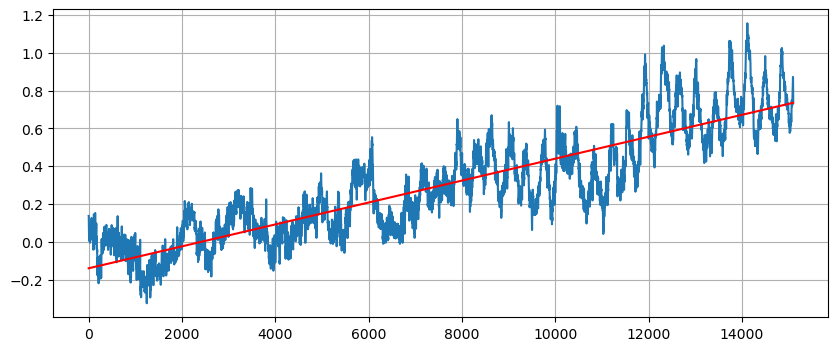

In [23]:
fig, ax= plt.subplots()
ax.plot(x,y)
ax.grid()
ax.plot(x,yi,'r')

In [24]:
trend = np.arange(0,y.size-1000)*0.0
i1=0
for inicial in np.arange(0,y.size-1000)*0.0:
    r = np.polyfit(x[i1:-1],y[i1:-1],1)
    trend[i1]=r[0]*365*100
    i1=i1+1

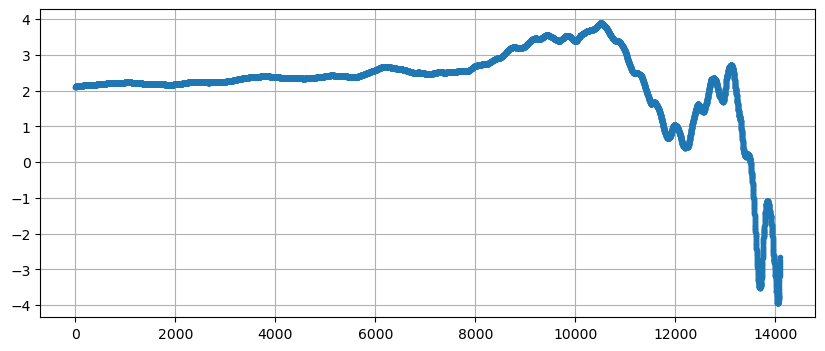

In [25]:
plt.plot(trend,'.')
plt.grid()

In [26]:
ind_notrend=min(np.nonzero(trend<=0))[0]

In [27]:
r = np.polyfit(x[ind_notrend:-1],y[ind_notrend:-1],1)
yi_notrend = np.polyval(r, x[ind_notrend:-1])

In [28]:
yi

array([-0.13943433, -0.1393764 , -0.13931847, ...,  0.73506285,
        0.73512078,  0.73517871])

<xarray.DataArray 'time' ()>
array('2018-12-23T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-12-23

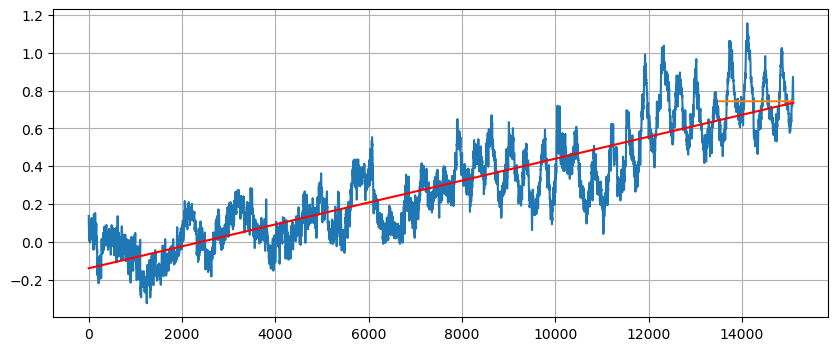

In [29]:
fig, ax= plt.subplots()
ax.plot(x,y)
ax.plot(x[ind_notrend:-1],yi_notrend)
ax.grid()
ax.plot(x,yi,'r')
(y.size-ind_notrend)/365
sst.time[ind_notrend]